# Application of Machine Learning to Make KPI's of a Power Plant

## Developing robust key performance indicators (KPI's) for the base utility power plant by employing machine learning on readily available data.

Key performance indicators (KPI) dashboards for the chemical and energy assets at the disposal of operators and manager can help in monitoring and improve efficiency. Reliable and robust deployment of the KPI's in the form of dashboards with predictive features can help plan in the decision making of future operations. Thermodynamic and first principle based models for chemical and energy plants consist of a complex system of non-linear equations. The solution of such models requires computing resources and time, which make them unsuitable for the robust deployment of KPI dashboards. Machine learning (ML) can be an alternative approach for developing models for such assets. It would ease deployment if the ML models use readily available sensor data and historic operation data.

In this post ML approach is demonstrated to predict net power output ($PE$) of base utility combined cycle power plant (CCPP). The CCPP consist of gas turbine (GT), stream turbine (ST), and heat recovery steam generators (HRSG). This type of power plant is being installed in increasing numbers around the world where there is access to substantial quantities of natural gas [1].

Gas turbine power output primarily depends on the ambient parameters which are ambient temperature, atmospheric pressure, and relative humidity. Steam turbine power output has a direct relationship with vacuum at exhaust [2]. Building on that four parameters that are readily available in a CCPP are selected: ambient temperature ($AT$), ambient pressure ($AP$), relative humidity ($RH$), and exhaust vacuum ($V$).

Operating data of power plants is the proprietary of the asset owners and/or design companies and public access is limited. For this project data was obtained from UCI repository for a CCPP located in turkey [2]. Dataset used was contained 9568 data points collected from a CCPP over 6 years (2006-2011), when the plant was set to work with full load. Data was collected by Pınar Tüfekci [2], and is available at: http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant.

The development of KPI was demonstrated using data analysis and regression tools.

Overall the two plots of this exercise show that the EP (a KPI measure) of a CCPP can be predicted using external readily available data with reasonable accuracy. This approach can be extended to more KPI measures and for other chemical and power plants. For this purpose, more test data and ML algorithm need to be evaluated. 

[1] Ramireddy V. An overview of combined cycle power plant. <http://electricalengineering-portal.com/an-overview-of-combined-cycle-power-plant> [accessed: 02.03.13].

[2] Tüfekci P. Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, Electrical Power and Energy Systems, 60, 126–140, 2014. 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('CCPP_data.xlsx', sheet_name='Sheet1', header=0)
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# Data is aleardy sorted and reported only where plant was operating at normal conditions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


## Data Analysis
### To find the correlation of PE with AT, V, AP, and RH

In the data analysis, data was loaded as pandas data frame and its features were explored. The correlation among the parameters was plotted as grid plot to find out independent nature of the data, results are shown below.

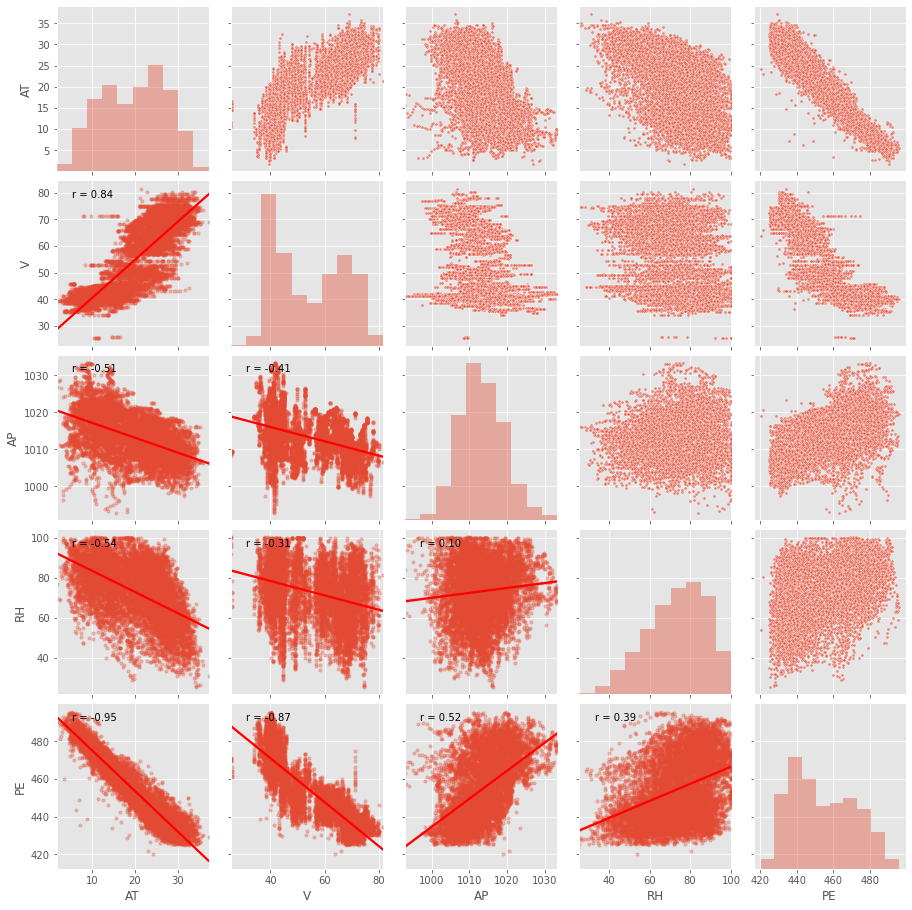

In [11]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

fig1 = sns.PairGrid(df, palette='muted')
fig1.map_upper(plt.scatter, s=10, edgecolor="white", alpha=0.6)
fig1.map_diag(sns.distplot, hist=True, kde=False, bins=10)
#fig1.map_lower(sns.kdeplot)
fig1.map_lower(sns.regplot, scatter=True, scatter_kws={"s":10,"alpha":0.30}, line_kws={"color":'r'})
fig1.map_lower(corrfunc)
plt.show()
fig1.savefig('ML-KPI-fig1.jpg', dpi=300)

Some insight into the correlation among parameters using Pearson correlation represented as a heat map.

In [5]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


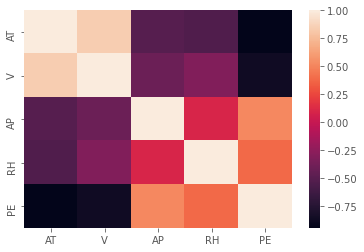

In [17]:
svm = sns.heatmap(df.corr())
figure = svm.get_figure()    
figure.savefig('ML-KPI-fig2.jpg', dpi=300)
plt.show()

### Insight from Data Analysis
* AT and V has inverse relationship with PE, meaning power out from the plant will be higher when the atmospheric temperature and vacuum in steam turbine exhaust are low. 
* AP and RH have relatively weak correlation with PE.
* Correlation among the parameters is also weak, showing independent nature of variables.

## Linear Regression for KPI's
For regression, the data was split into two sets: train set and test set. A linear regression model was trained on the train set and results were evaluated by comparing with the test set. The predicted PE values were plotted against the measured ones and goodness of prediction measures such as MAE, MSE, and RMSE were calculated.  Jupyter notebook Q3_Plot2 shows the results.

## Training a Linear Regression Model

We will need to first split up the dataframe into two data sets: 

* A training set
* A test test

We will train out model on the training set and then use the test set to evaluate the model.

Further, X contains the features $AT$, $V$, $AP$, $RH$ to train on, and y is the target variable $PE$.

In [7]:
X=df[["AT","V","AP","RH"]]
y=df[["PE"]]

## Train Test Split

40% of the data is kept here for testing.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

## Model Training

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

## Prediction of $PE$ from the Model and Result Evaluations

Let's grab predictions off our test set and see how well it did!

Following are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

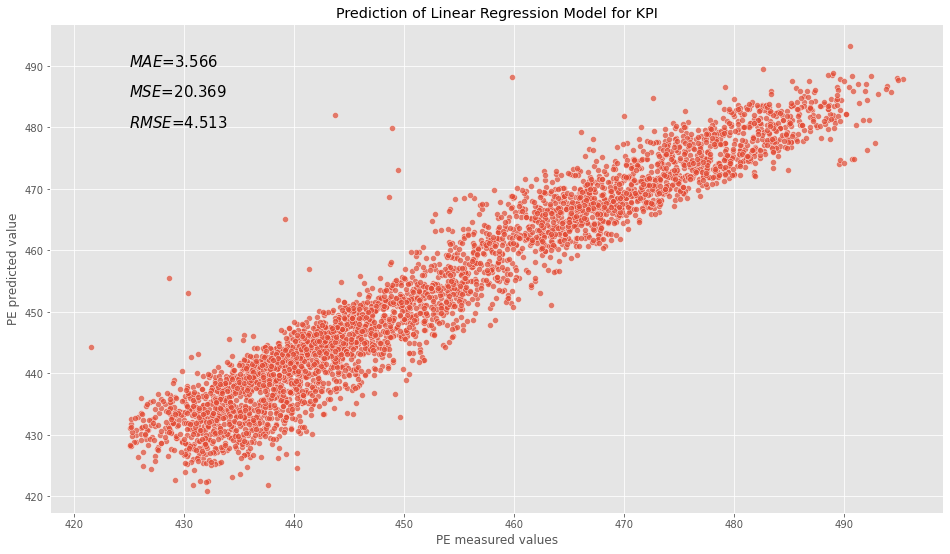

<Figure size 432x288 with 0 Axes>

In [23]:
PE_pred = lm.predict(X_test)
plt.style.use('ggplot')

from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test, PE_pred)
MSE=metrics.mean_squared_error(y_test, PE_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, PE_pred))

MAE_str=('$MAE$={:.3f}'.format(MAE))
MSE_str=('$MSE$={:.3f}'.format(MSE))
RMSE_str=('$RMSE$={:.3f}'.format(RMSE))

#fig, axes = plt.subplots(figsize=(12,8))

fig, axes = plt.subplots(1,1, figsize=(16,9))

# axes = fig.add_axes([0.02,0.02,0.98,0.98])

axes.scatter(y_test.values,PE_pred, alpha=0.7, edgecolor='w')
axes.set_xlabel('PE measured values')
axes.set_ylabel('PE predicted value')
axes.set_title('Prediction of Linear Regression Model for KPI')
axes.text(425, 490, MAE_str, fontsize=15)
axes.text(425, 485, MSE_str, fontsize=15)
axes.text(425, 480, RMSE_str, fontsize=15)
plt.show()
plt.tight_layout()
fig.savefig('ML-KPI-fig3.jpg', dpi=300)

### Insights from the prediction plot
* $MAE$, $MSE$, and $RMSE$ are **loss functions**, and lower values of these show a good prediction from the model.

## Conclusion
* The regression results shows that KPI's measure such as Power Outut ($PE$) of an CCPP can be predicted using readily avialble parameters.
* This approach can be extended to predict other KPI's for chemical and energy plants. 
